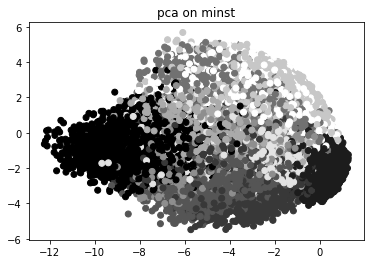

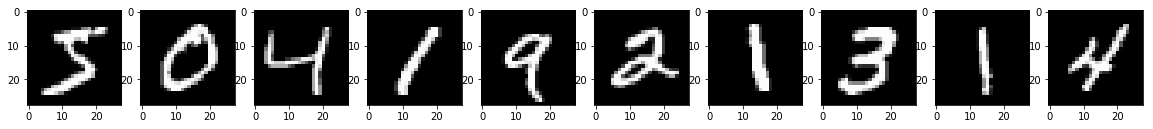

In [22]:
from numpy import mean
from numpy import cov
from numpy.linalg import eigh
import numpy as np
from keras.datasets import mnist
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

(X_train, y_train), (X_test, y_test) = mnist.load_data()

_X_train = X_train
X_train = X_train.reshape((X_train.shape[0], 28*28)).astype('float32') / 255.0


dims = 784

def pca(data):
    cova = cov(data.T) 
    values, vectors = eigh(cova)
    idx = np.argsort(values)[::-1]
    values = np.real(values[idx])
    vectors = np.real(vectors.T[idx])
    return values, vectors

values, vectors = pca(X_train)

P = X_train.dot(vectors[:dims].T)

plt.scatter(P[:, 0], P[:, 1],c=y_train)

plt.title("pca on minst")
plt.show()

images = np.dot(P, vectors[:dims])
images_autoencoder =  images

images = images.reshape( -1, 28, 28)


n = 10
plt.figure(figsize=(20, 4))
for i in range(n):


    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(images[i], cmap='gray')
    
plt.show()


In [29]:
from keras.layers import Input, Dense
from keras.models import Model

encoding_dim = 2

input_img = Input(shape=(images_autoencoder.shape[1],))

encoded = Dense(encoding_dim, activation='relu')(input_img)

decoded = Dense(images_autoencoder.shape[1], activation='sigmoid')(encoded)

autoencoder = Model(input_img, decoded)

encoder = Model(input_img, encoded)


encoded_input = Input(shape=(encoding_dim,))

decoder_layer = autoencoder.layers[-1]

decoder = Model(encoded_input, decoder_layer(encoded_input))

autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy', metrics=['accuracy'])

In [30]:
autoencoder.fit(images_autoencoder, images_autoencoder,
                epochs=50,
                batch_size=256,
                shuffle=True)

Epoch 1/50
60000/60000 [==============================] - 3s 49us/step - loss: 0.3881 - acc: 0.0210
Epoch 2/50
60000/60000 [==============================] - 3s 49us/step - loss: 0.2722 - acc: 0.0219
Epoch 3/50
60000/60000 [==============================] - 3s 44us/step - loss: 0.2633 - acc: 0.0222
Epoch 4/50
60000/60000 [==============================] - 3s 46us/step - loss: 0.2560 - acc: 0.0227
Epoch 5/50
60000/60000 [==============================] - 3s 46us/step - loss: 0.2537 - acc: 0.0228
Epoch 6/50
60000/60000 [==============================] - 3s 50us/step - loss: 0.2526 - acc: 0.0229
Epoch 7/50
60000/60000 [==============================] - 3s 47us/step - loss: 0.2519 - acc: 0.0229
Epoch 8/50
60000/60000 [==============================] - 3s 47us/step - loss: 0.2512 - acc: 0.0229
Epoch 9/50
60000/60000 [==============================] - 3s 48us/step - loss: 0.2507 - acc: 0.0229
Epoch 10/50
60000/60000 [==============================] - 3s 55us/step - loss: 0.2501 - acc: 0.0229

In [32]:
encoded_imgs = encoder.predict(images_autoencoder)
decoded_imgs = decoder.predict(encoded_imgs)

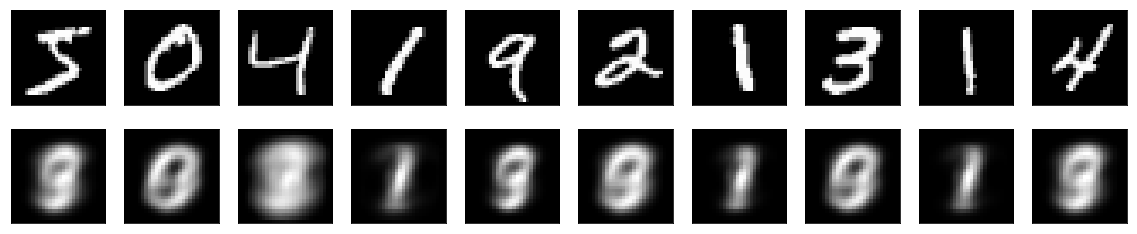

In [33]:
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(images_autoencoder[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

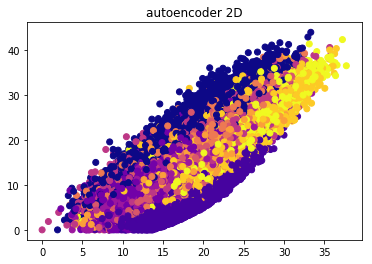

In [35]:
plt.title("autoencoder 2D")
plt.scatter(encoded_imgs[:, 0], encoded_imgs[:, 1],c=y_train,cmap="plasma")
